In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
data.shape

(10841, 13)

In [6]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
data.duplicated().sum()

483

In [11]:
# dropping the duplicate values
data = data.drop_duplicates()

In [12]:
data.duplicated().sum()

0

In [13]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [14]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [15]:
# it is possible that there can be one or two object data point so it is converting all to object as if we get only one value as obecjt in a col of n entries it converts entire col to object 

# we will check this condition in our data frame

data[~data.Reviews.str.isnumeric()] # there cal are the reason why we were getting our review col as object


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
data_copy1 = data.copy()

In [17]:
data_copy1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [18]:
# reseting the index as we droped the duplicate values

In [19]:
data_copy1.reset_index(drop = True , inplace = True)

In [20]:
data_copy1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [21]:
data_copy1[~data_copy1.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
data_copy1 = data_copy1.drop(data_copy1.index[9990]) 

In [23]:
#  now there is no value in reviews cal which is non numeric
data_copy1[~data_copy1.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [24]:
data_copy1['Reviews'] = data_copy1['Reviews'].copy().astype(int)

In [25]:
data_copy1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
# now similarly our size col should also be numeric
m= "12m"
n = int(m[:-1])
print(m)
print(n)

12m
12


In [27]:
# we know 1mb = 1024 kb
def size_transform(item):
    if str(item)[-1] in range(0,9):
        return float(item)
    if str(item)[-1]=='M' :
        ans = str(item).replace("M","")
        ans = float(ans)*1024
        return ans
    elif str(item)[-1]=="K":
        ans = str(item).replace("K","")
        return float(ans)
    else :
        return float(np.nan)


In [28]:
data_copy1['Size'] = data_copy1['Size'].apply(size_transform)

In [29]:
data_copy1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [30]:
data_copy1['Size'].unique

<bound method Series.unique of 0        19456.0
1        14336.0
2         8908.8
3        25600.0
4         2867.2
          ...   
10353    54272.0
10354     3686.4
10355     9728.0
10356        NaN
10357    19456.0
Name: Size, Length: 10357, dtype: float64>

In [31]:
data_copy1["Installs"].unique
# in this col also just because of the + symbol at the last it is giving it as object .. changing it to float by removing that last +

<bound method Series.unique of 0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10353         5,000+
10354           100+
10355         1,000+
10356         1,000+
10357    10,000,000+
Name: Installs, Length: 10357, dtype: object>

In [32]:
# we know 1mb = 1024 kb
def installs_transform(item):
    if str(item)[-1] == '+':
        ans = str(item).replace("+","")
        ans = str(ans).replace(",","")
        return float(ans)
    elif str(item)[-1] in range(0,10):
        ans = str(item).replace(",","")
        return float(item)

In [33]:
data_copy1["Installs"] = data_copy1["Installs"].apply(installs_transform)

In [34]:
data_copy1.head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,All of the parking lot - National Park applica...,AUTO_AND_VEHICLES,4.0,1754,14336.0,500000.0,Free,0,Everyone,Auto & Vehicles,"June 2, 2018",2.3.4,4.0 and up
96,Inquiry Fines and Debits of Vehicles,AUTO_AND_VEHICLES,4.4,2680,2252.8,500000.0,Free,0,Everyone,Auto & Vehicles,"March 20, 2018",1.03,4.0.3 and up
97,Gas Station,AUTO_AND_VEHICLES,4.0,1288,4608.0,100000.0,Free,0,Everyone,Auto & Vehicles,"April 21, 2018",2.17,4.0 and up
98,Hush - Beauty for Everyone,BEAUTY,4.7,18900,17408.0,500000.0,Free,0,Everyone,Beauty,"August 2, 2018",6.10.1,5.0 and up


In [35]:
data_copy1.describe()

,Rating,Reviews,Size,Installs
count,8892.000000,1.035700e+04,8516.000000,1.035600e+04
mean,4.187877,4.059046e+05,22588.013903,1.415913e+07
std,0.522377,2.696778e+06,23129.599584,8.024331e+07
min,1.000000,0.000000e+00,1024.000000,0.000000e+00
25%,4.000000,3.200000e+01,5427.200000,1.000000e+03
50%,4.300000,1.680000e+03,14336.000000,1.000000e+05
75%,4.500000,4.641600e+04,30720.000000,1.000000e+06
max,5.000000,7.815831e+07,102400.000000,1.000000e+09


In [36]:
data_copy1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [37]:
# we know 1mb = 1024 kb
def Price_transform(item):
        ans = item.replace("$","")
        return float(ans)

In [38]:
data_copy1['Price'] = data_copy1['Price'].apply(Price_transform)

In [39]:
data_copy1['Price'] = data_copy1['Price'].astype(float)

In [40]:
data_copy1.describe()

,Rating,Reviews,Size,Installs,Price
count,8892.000000,1.035700e+04,8516.000000,1.035600e+04,10357.000000
mean,4.187877,4.059046e+05,22588.013903,1.415913e+07,1.030800
std,0.522377,2.696778e+06,23129.599584,8.024331e+07,16.278625
min,1.000000,0.000000e+00,1024.000000,0.000000e+00,0.000000
25%,4.000000,3.200000e+01,5427.200000,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,14336.000000,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,30720.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,102400.000000,1.000000e+09,400.000000


In [41]:
data_copy1['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [42]:
 data_copy1['Last Updated'] = pd.to_datetime(data_copy1['Last Updated'])

In [43]:
data_copy1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [44]:
data_copy1.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,8892.000000,1.035700e+04,8516.000000,1.035600e+04,10357.000000,10357
mean,4.187877,4.059046e+05,22588.013903,1.415913e+07,1.030800,2017-11-14 09:25:19.320266496
min,1.000000,0.000000e+00,1024.000000,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,3.200000e+01,5427.200000,1.000000e+03,0.000000,2017-09-03 00:00:00
50%,4.300000,1.680000e+03,14336.000000,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.500000,4.641600e+04,30720.000000,1.000000e+06,0.000000,2018-07-19 00:00:00
max,5.000000,7.815831e+07,102400.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.522377,2.696778e+06,23129.599584,8.024331e+07,16.278625,NaN


In [45]:
data_copy1['Last_updated_Day']  = data_copy1['Last Updated'].dt.day
data_copy1['Last_updated_Month'] = data_copy1['Last Updated'].dt.month
data_copy1['Last_updated_Year'] = data_copy1['Last Updated'].dt.year

In [46]:
data_copy1.drop('Last Updated',inplace = True,axis = 1)
data_copy1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_updated_Day,Last_updated_Month,Last_updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000.0,Free,0.0,Everyone,Education,1.48,4.1 and up,25,7,2017
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100.0,Free,0.0,Everyone,Education,1.0,4.1 and up,6,7,2018
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000.0,Free,0.0,Everyone,Medical,1.0,2.2 and up,20,1,2017
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,19,1,2015


In [47]:
data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10357 non-null  object 
 1   Category            10357 non-null  object 
 2   Rating              8892 non-null   float64
 3   Reviews             10357 non-null  int32  
 4   Size                8516 non-null   float64
 5   Installs            10356 non-null  float64
 6   Type                10356 non-null  object 
 7   Price               10357 non-null  float64
 8   Content Rating      10357 non-null  object 
 9   Genres              10357 non-null  object 
 10  Current Ver         10349 non-null  object 
 11  Android Ver         10355 non-null  object 
 12  Last_updated_Day    10357 non-null  int32  
 13  Last_updated_Month  10357 non-null  int32  
 14  Last_updated_Year   10357 non-null  int32  
dtypes: float64(4), int32(4), object(7)
memory usage: 1.1+ MB


In [48]:
data_copy1['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [49]:
data_copy1['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [50]:
import numpy as np
import re

def Android_ver_transform(item):
    # Handle NaN or non-string values
    if not isinstance(item, str) or item.strip().lower() == 'varies with device':
        return np.nan
    
    # Handle ranges like "4.0.3 - 7.1.1"
    if ' - ' in item:
        versions = re.findall(r'\d+\.?\d*', item)
        if versions:
            return str(max([float(v) for v in versions]))
    
    # Handle "4.0.3 and up" → take the numeric part
    versions = re.findall(r'\d+\.?\d*', item)
    if versions:
        return str(float(versions[0]))
    
    return np.nan

            

data_copy1['Android Ver']  = data_copy1['Android Ver'].apply(Android_ver_transform)

In [51]:
data_copy1['Current Ver'] = data_copy1['Current Ver'].apply(Android_ver_transform)

In [52]:
data_copy1['Android Ver'].unique()

array(['4.0', '4.2', '4.4', '2.3', '3.0', '4.1', nan, '2.2', '5.0', '6.0',
       '1.6', '1.5', '2.1', '7.0', '5.1', '4.3', '7.1', '2.0', '3.2',
       '8.0', '3.1', '1.0'], dtype=object)

In [53]:
data_copy1['Android Ver'] = data_copy1['Android Ver'].astype(float)

In [54]:
data_copy1['Current Ver'] = data_copy1['Current Ver'].astype(float)

In [55]:
#dropping the duplicated app from our data frame 
data_copy2 = data_copy1.drop_duplicates(subset = ['App'],keep = 'first')

In [56]:
data_copy2[data_copy2.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_updated_Day,Last_updated_Month,Last_updated_Year


In [57]:
categorical_col = []
numerical_col = []
for col in data_copy2.columns:
    if data_copy2[col].dtype == object:
        categorical_col.append(col)
    else:
        numerical_col.append(col)

In [58]:
print(categorical_col)

['App', 'Category', 'Type', 'Content Rating', 'Genres']


In [59]:
print(numerical_col)

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Current Ver', 'Android Ver', 'Last_updated_Day', 'Last_updated_Month', 'Last_updated_Year']


In [120]:
data_copy2[categorical_col]

,App,Category,Type,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity
...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education
10355,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference


In [122]:
data_copy2[numerical_col]

,Rating,Reviews,Size,Installs,Price,Current Ver,Android Ver,Last_updated_Day,Last_updated_Month,Last_updated_Year
0,4.1,159,19456.0,10000.0,0.0,1.00,4.0,7,1,2018
1,3.9,967,14336.0,500000.0,0.0,2.00,4.0,15,1,2018
2,4.7,87510,8908.8,5000000.0,0.0,1.20,4.0,1,8,2018
3,4.5,215644,25600.0,50000000.0,0.0,NaN,4.2,8,6,2018
4,4.3,967,2867.2,100000.0,0.0,1.10,4.4,20,6,2018
...,...,...,...,...,...,...,...,...,...,...
10353,4.5,38,54272.0,5000.0,0.0,1.48,4.1,25,7,2017
10354,5.0,4,3686.4,100.0,0.0,1.00,4.1,6,7,2018
10355,NaN,3,9728.0,1000.0,0.0,1.00,2.2,20,1,2017
10356,4.5,114,NaN,1000.0,0.0,NaN,NaN,19,1,2015


In [158]:
# categorical feature analysis
# count distribution od free and paid apps
free , paid = data_copy2['Type'].value_counts(normalize = True)*100
print(f"{free:.2f}% user uses free apps and {paid:.2f}% user user paid apps")

92.17% user uses free apps and 7.83% user user paid apps


In [160]:
# count of distinct categories
data_copy2['Category'].value_counts(normalize = True).round(2)*100

Category
FAMILY                 19.0
GAME                   10.0
TOOLS                   9.0
BUSINESS                4.0
MEDICAL                 4.0
PERSONALIZATION         4.0
PRODUCTIVITY            4.0
LIFESTYLE               4.0
FINANCE                 4.0
SPORTS                  3.0
COMMUNICATION           3.0
HEALTH_AND_FITNESS      3.0
PHOTOGRAPHY             3.0
NEWS_AND_MAGAZINES      3.0
SOCIAL                  2.0
BOOKS_AND_REFERENCE     2.0
TRAVEL_AND_LOCAL        2.0
SHOPPING                2.0
DATING                  2.0
VIDEO_PLAYERS           2.0
MAPS_AND_NAVIGATION     1.0
EDUCATION               1.0
FOOD_AND_DRINK          1.0
ENTERTAINMENT           1.0
AUTO_AND_VEHICLES       1.0
LIBRARIES_AND_DEMO      1.0
WEATHER                 1.0
HOUSE_AND_HOME          1.0
EVENTS                  1.0
ART_AND_DESIGN          1.0
PARENTING               1.0
COMICS                  1.0
BEAUTY                  1.0
Name: proportion, dtype: float64

In [162]:
# COUNT DISTRIBUTION OF CONTENT RATINNGS
data_copy2['Content Rating'].value_counts(normalize = True).round(2)*100

Content Rating
Everyone           82.0
Teen               11.0
Mature 17+          4.0
Everyone 10+        3.0
Adults only 18+     0.0
Unrated             0.0
Name: proportion, dtype: float64

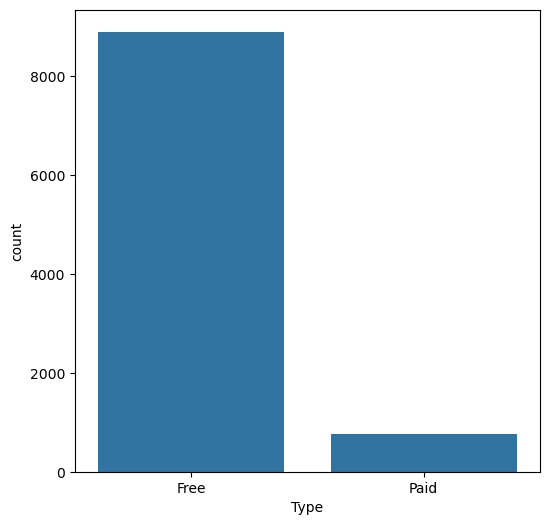

In [186]:
plt.figure(figsize=(6,6))
sns.countplot(x = data_copy2['Type'])
plt.show()

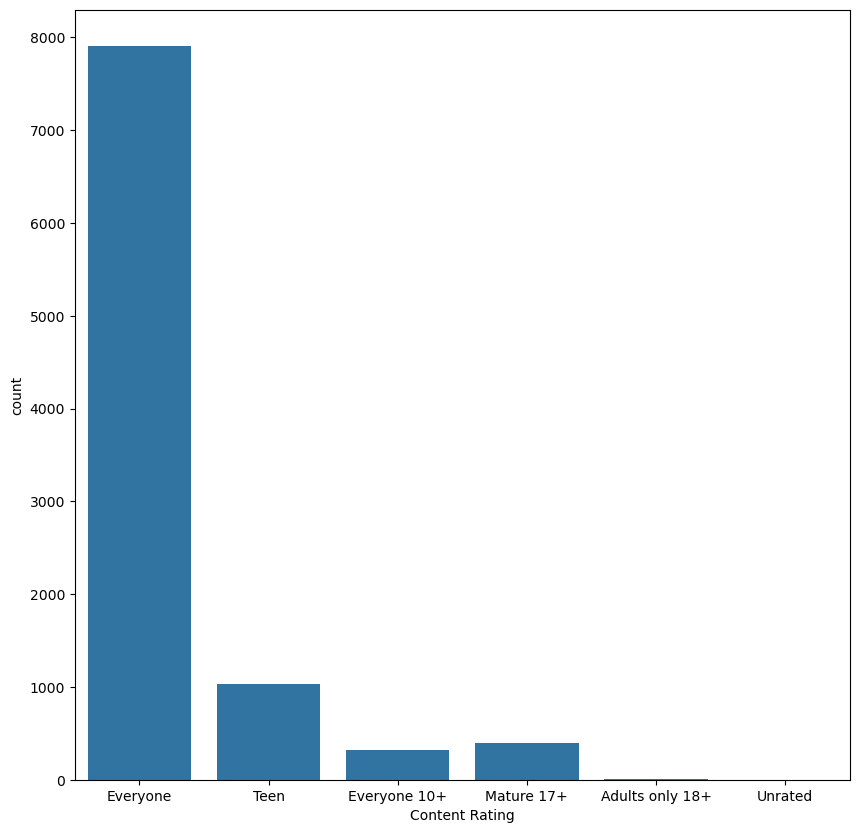

In [197]:
plt.figure(figsize=(10,10))
sns.countplot(x = data_copy2['Content Rating'] )
plt.show()

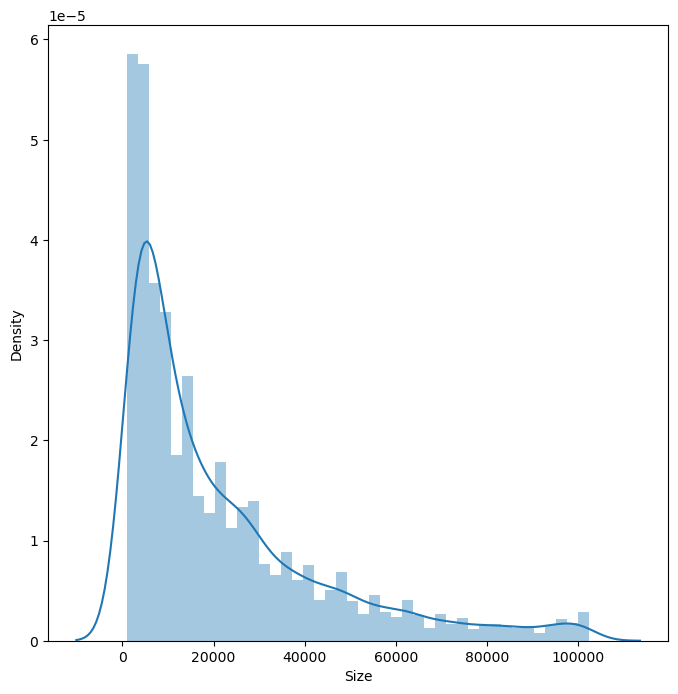

In [204]:
plt.figure(figsize = (8,8))
sns.distplot(data_copy2['Size'] , kde = True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

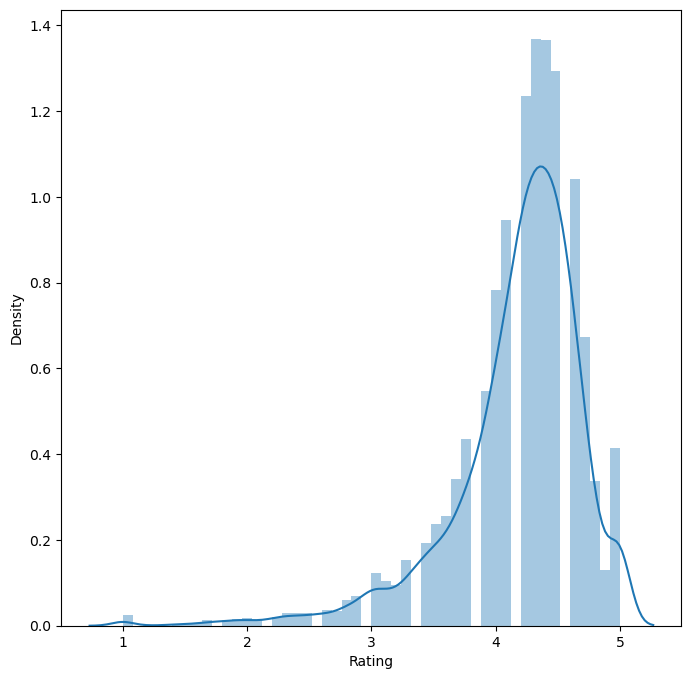

In [215]:
plt.figure(figsize = (8,8))
sns.distplot(data_copy2['Rating'] , kde = True)
plt.show

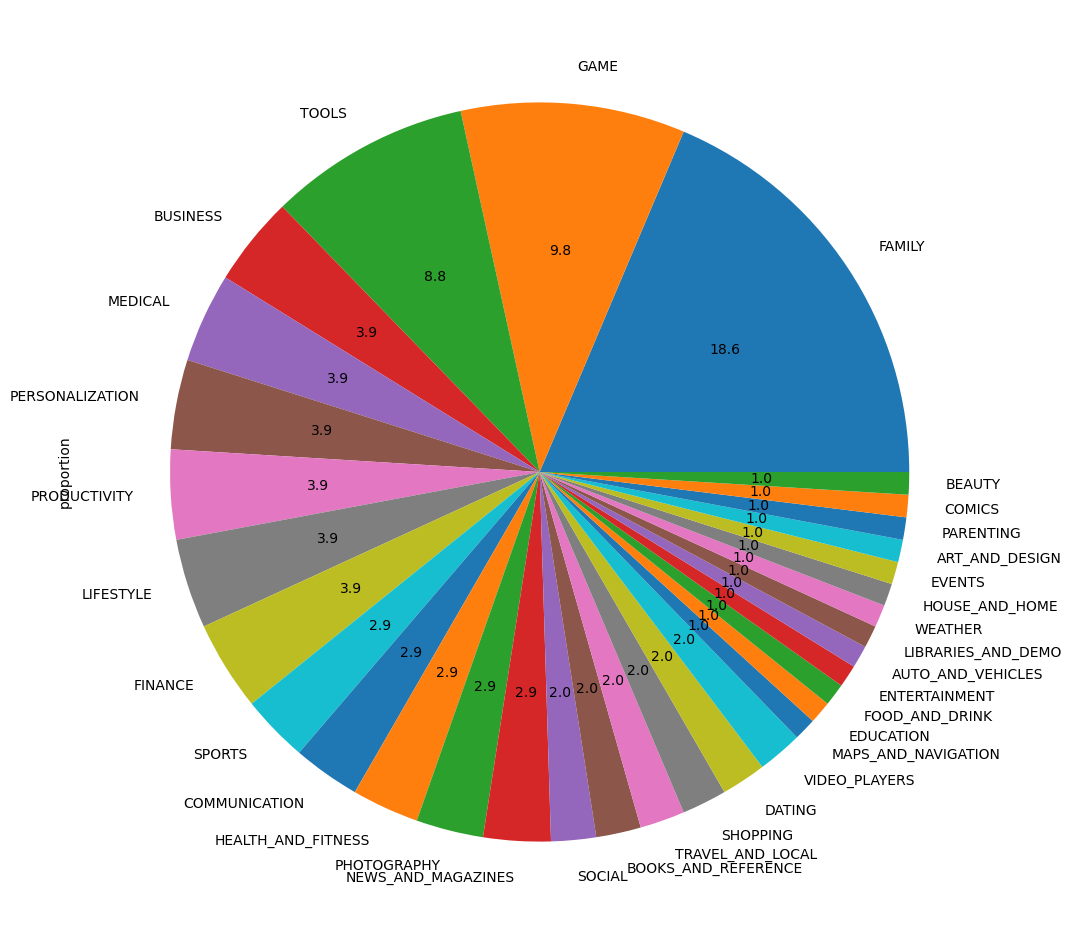

In [251]:
plt.figure(figsize  = (12,12))
data_copy2['Category'].value_counts(normalize = True).round(2).plot.pie(y = data_copy2['Category'],autopct = "%1.1f")
plt.show()

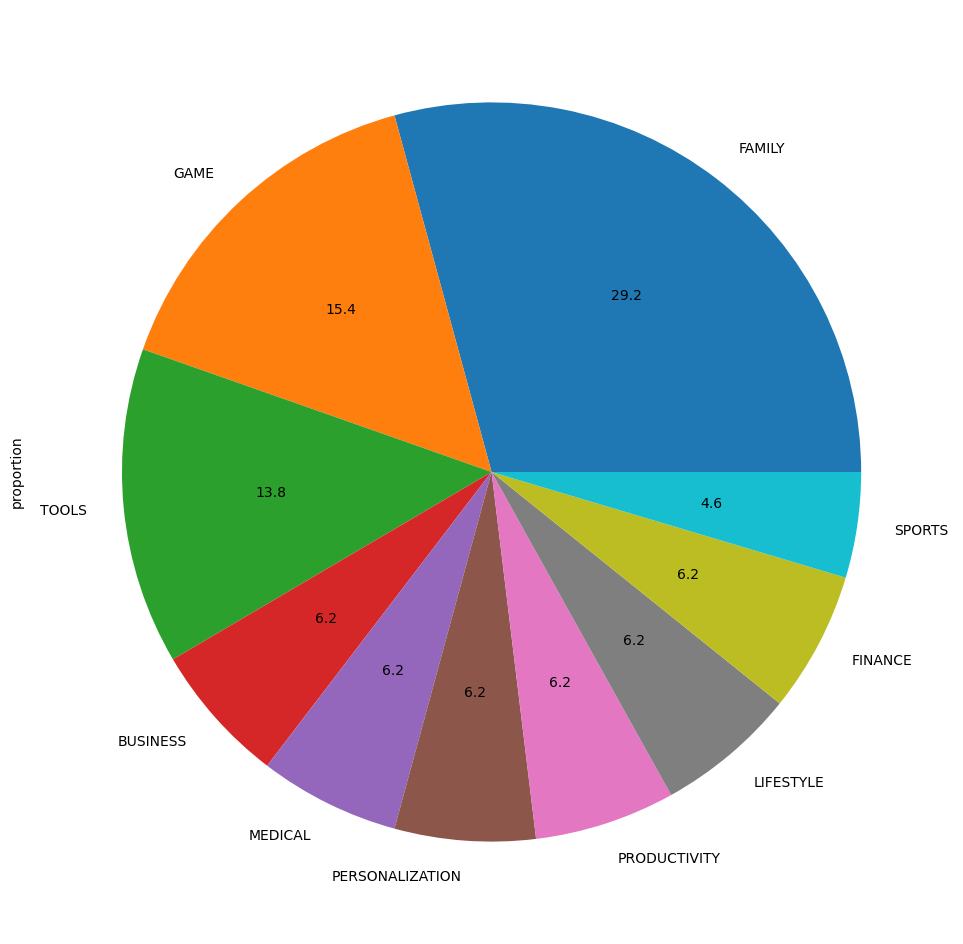

In [259]:
plt.figure(figsize  = (12,12))
data_copy2['Category'].value_counts(normalize = True)[:10].round(2).plot.pie(y = data_copy2['Category'],autopct = "%1.1f")
plt.show()

In [ ]:
# insights is the most popular category is family 
# and top 10 categories are
# FAMILY             19
# GAME               10
# TOOLS              09
# BUSINESS           04
# MEDICAL            04
# PERSONALIZATION    04
# PRODUCTIVITY       04
# LIFESTYLE          04
# FINANCE            04
# SPORTS             03

In [316]:
x = data_copy2['Category'].value_counts()[:10]
df = x.reset_index()
df.columns = ['groups','counts']

In [318]:
df

,groups,counts
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


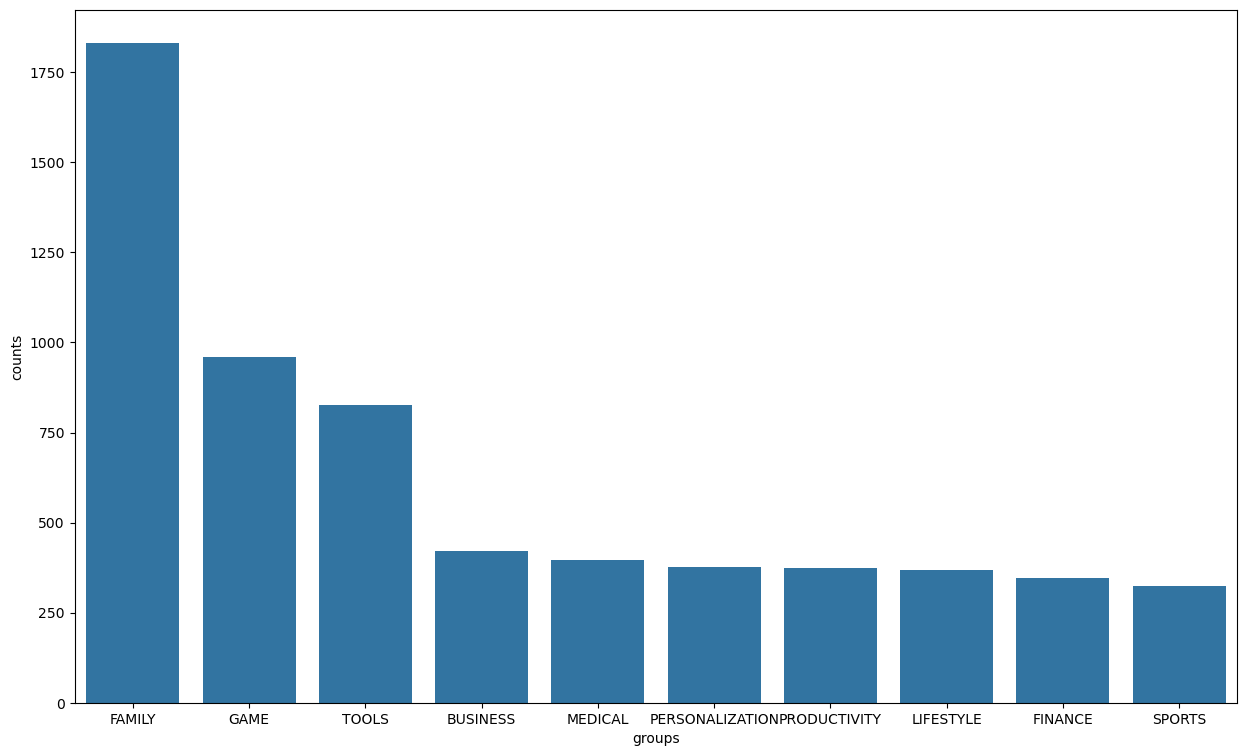

In [326]:
plt.figure(figsize = (15,9))
sns.barplot(df , x = df['groups']  , y = df['counts'])
plt.show()

In [348]:
data_copy2.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()

,Category,Installs
0,GAME,1.387892e+10
1,COMMUNICATION,1.103828e+10
2,TOOLS,8.001772e+09
3,PRODUCTIVITY,5.793091e+09
4,SOCIAL,5.487868e+09
5,PHOTOGRAPHY,4.649148e+09
6,FAMILY,4.427942e+09
7,VIDEO_PLAYERS,3.926903e+09
8,TRAVEL_AND_LOCAL,2.894887e+09
9,NEWS_AND_MAGAZINES,2.369218e+09
